In [1]:
# Necessary import evil
%matplotlib inline
from physt import histogram, binning
import numpy as np
import matplotlib.pyplot as plt

In [2]:
heights1 = np.random.normal(169, 10, 100000)
heights2 = np.random.normal(180, 6, 100000)
numbers = np.random.rand(100000)

## Ideal number of bins

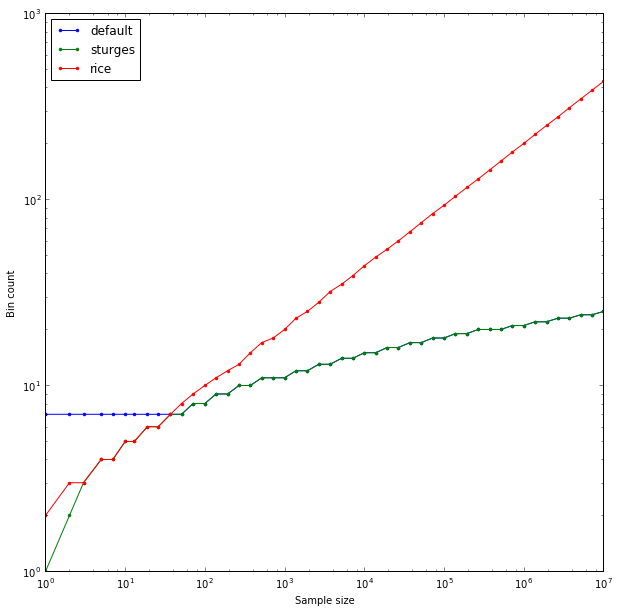

In [3]:
X = [int(x) for x in np.logspace(0, 7)]

algos = binning.bincount_methods
Ys = { algo: [] for algo in algos}

for x in X:
    ex_dataset = np.ones(int(x))
    for algo in algos:
        Ys[algo].append(binning.ideal_bin_count(ex_dataset, algo))

figure, axis = plt.subplots(figsize=(10, 10))
for algo in algos:
    axis.plot(X, Ys[algo], ".-", label=algo)
axis.set_xscale("log")
axis.set_yscale("log")
axis.set_xlabel("Sample size")
axis.set_ylabel("Bin count")
axis.legend(loc=2);

## Binning schemes

### Exponential binning

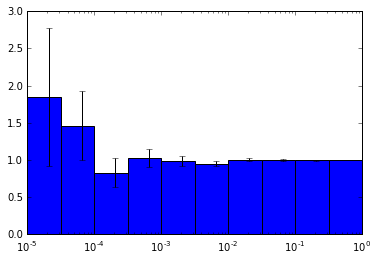

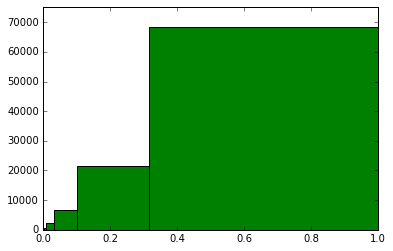

In [4]:
# bins1 = binning.exponential(numbers, 20, range=(-5, 0))
hist1 = histogram(numbers, "exponential", 10, range=(-5, 0))
axis = hist1.plot(density=True, errors=True)
hist1[4:].plot(color="green")
axis.set_xscale("log")

### Quantile-based binning

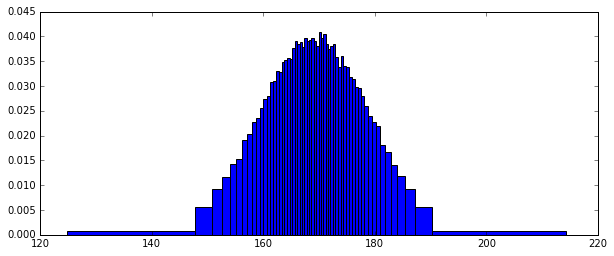

In [5]:
figure, axis = plt.subplots(figsize=(10, 4))
bins2 = binning.quantile(heights1, 60)
hist2 = histogram(heights1, bins=bins2)
hist2.plot(density=True, ax=axis);

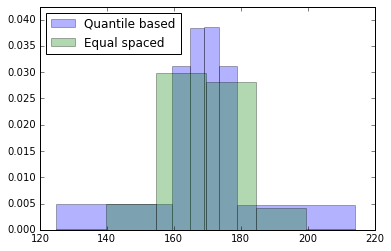

In [6]:
figure, axis = plt.subplots()

histogram(heights1, "quantile", 6).plot(alpha=0.3, density=True, ax=axis, label="Quantile based")
histogram(heights1, 6).plot(alpha=0.3, density=True, ax=axis, color="green", label="Equal spaced")
axis.legend(loc=2);

### Fixed-width bins

Histogram1D(bins=19, total=100000.0)

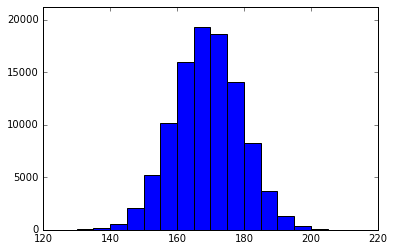

In [7]:
hist_fixed = histogram(heights1, "fixed_width", 5)
hist_fixed.plot()
hist_fixed

## Astropy binning

/home/pipek/anaconda3/lib/python3.5/site-packages/astropy/stats/bayesian_blocks.py:421: UserWarning: p0 does not seem to accurately represent the false positive rate for event data. It is highly recommended that you run random trials on signal-free noise to calibrate ncp_prior to achieve a desired false positive rate.
  warnings.warn('p0 does not seem to accurately represent the false '


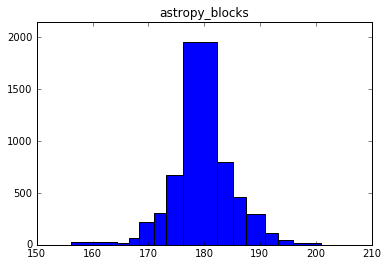

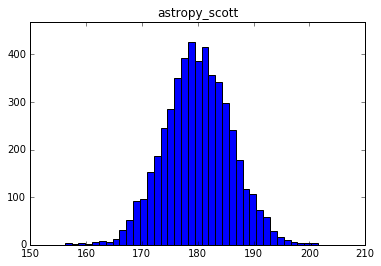

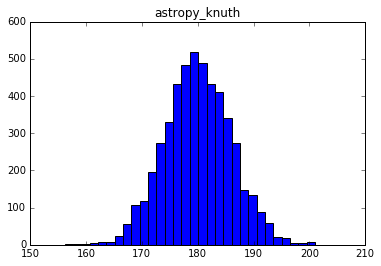

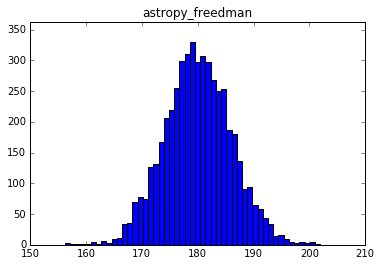

In [9]:
middle_sized = np.random.normal(180, 6, 5000)

for n in ["blocks", "scott", "knuth", "freedman"]:
    algo = "astropy_{0}".format(n)
    hist = histogram(middle_sized, algo, name=algo)
    hist.plot()